In [16]:
!pip install -q plotly nbformat

import plotly.express as px

import pandas as pd
my_dict = {
    'Input': ['Text', 'Speech', 'Text', 'Tabular'],
    'Method': ['ML', 'Statistics', 'Causal inference', 'ML'],
    'Topic': ['Suicide', 'Psychology', 'Psychedelics', 'Meditation']
}

df = pd.DataFrame(my_dict)

# Create the parallel categories diagram
fig = px.parallel_categories(
    df, 
    dimensions=df.columns.tolist(),  # Specify the columns to use as dimensions
    # color="size",  # Optional: Color the flows by a continuous variable
    color_continuous_scale=px.colors.sequential.Inferno,  # Optional: Choose a color scale
)

fig.show()

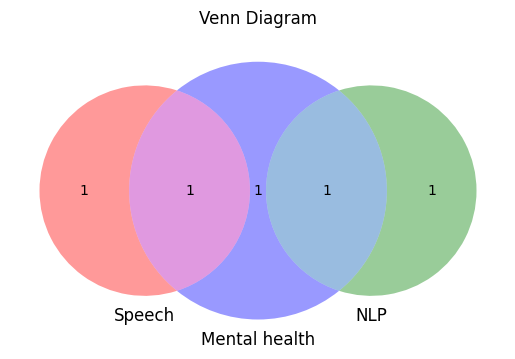

In [7]:
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt

def create_venn_diagram(data, sets_labels):
    """
    Creates a Venn diagram based on instance membership.

    Parameters:
    - data (dict): A dictionary where keys are instances and values are lists of set labels the instance belongs to.
    - sets_labels (list): A list of set labels to include in the diagram (max 3 for visualization).

    Example:
    data = {
        'instance1': ['A', 'B'],
        'instance2': ['A'],
        'instance3': ['B', 'C'],
        'instance4': ['C']
    }
    sets_labels = ['A', 'B', 'C']
    """
    if len(sets_labels) < 2 or len(sets_labels) > 3:
        raise ValueError("This function supports 2 or 3 sets for visualization.")

    # Initialize the sets
    sets = {label: set() for label in sets_labels}

    # Fill the sets with instances
    for instance, memberships in data.items():
        for membership in memberships:
            if membership in sets:
                sets[membership].add(instance)

    # Create the appropriate Venn diagram
    if len(sets_labels) == 2:
        venn = venn2([sets[sets_labels[0]], sets[sets_labels[1]]], set_labels=sets_labels)
    elif len(sets_labels) == 3:
        venn = venn3([sets[sets_labels[0]], sets[sets_labels[1]], sets[sets_labels[2]]], set_labels=sets_labels)

    plt.title("Venn Diagram")
    plt.show()

# Example Usage
data = {
    '1': ['Speech', 'Mental health'],
    # '2': ['Speech', 'Causal inference'],
    '3': ['Speech'],
    '4': ['NLP'],
    '5': ['NLP', 'Mental health'],
    # '6': ['NLP', 'Causal inference'],
    '7': ['Mental health'],
    # '9': ['Mental health', 'Causal inference'],
    # '10': ['Causal inference'],
    
}
sets_labels = ['Speech', 'NLP', 'Mental health']

create_venn_diagram(data, sets_labels)

In [9]:
!pip install upsetplot


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for upsetplot: filename=UpSetPlot-0.9.0-py3-none-any.whl size=24839 sha256=80f2254ad3e1451871f7ff83e52adbdfc00ce912037edf97fe014aa3a37f0cef
  Stored in directory: /Users/danielmlow/Library/Caches/pip/wheels/73/42/9f/1c9718ea27f30466d2787e0f7d88a7cb11942e3460c17e0ef6
Successfully built upsetplot


/Users/danielmlow/miniconda3/envs/ct/lib/python3.10/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/Users/danielmlow/miniconda3/envs/ct/lib/python3.10/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

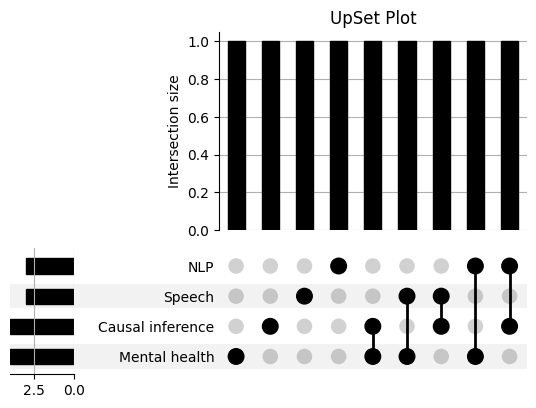

In [11]:
from matplotlib_venn import venn2, venn3
from upsetplot import UpSet
import matplotlib.pyplot as plt
import pandas as pd

def create_venn_diagram(data, sets_labels):
    """
    Creates a Venn diagram or UpSet plot based on instance membership.

    Parameters:
    - data (dict): A dictionary where keys are instances and values are lists of set labels the instance belongs to.
    - sets_labels (list): A list of set labels to include in the diagram (max 4 for visualization).

    Example:
    data = {
        'instance1': ['A', 'B'],
        'instance2': ['A'],
        'instance3': ['B', 'C'],
        'instance4': ['C', 'D'],
    }
    sets_labels = ['A', 'B', 'C', 'D']
    """
    if len(sets_labels) < 2:
        raise ValueError("At least 2 sets are required for visualization.")
    
    if len(sets_labels) <= 3:
        # Initialize the sets
        sets = {label: set() for label in sets_labels}
        
        # Fill the sets with instances
        for instance, memberships in data.items():
            for membership in memberships:
                if membership in sets:
                    sets[membership].add(instance)
        
        # Create the appropriate Venn diagram
        if len(sets_labels) == 2:
            venn = venn2([sets[sets_labels[0]], sets[sets_labels[1]]], set_labels=sets_labels)
        elif len(sets_labels) == 3:
            venn = venn3([sets[sets_labels[0]], sets[sets_labels[1]], sets[sets_labels[2]]], set_labels=sets_labels)
        
        plt.title("Venn Diagram")
        plt.show()
    else:
        # For 4 or more sets, use an UpSet plot
        # Create a membership dataframe
        membership = []
        for instance, memberships in data.items():
            membership.append([1 if label in memberships else 0 for label in sets_labels])
        membership_df = pd.DataFrame(membership, columns=sets_labels, index=data.keys())
        
        # Create the UpSet plot
        upset_data = membership_df.groupby(sets_labels).size()
        UpSet(upset_data, subset_size='count').plot()
        plt.title("UpSet Plot")
        plt.show()

# Example Usage
data = {
    '1': ['Speech', 'Mental health'],
    '2': ['Speech', 'Causal inference'],
    '3': ['Speech'],
    '4': ['NLP'],
    '5': ['NLP', 'Mental health'],
    '6': ['NLP', 'Causal inference'],
    '7': ['Mental health'],
    '9': ['Mental health', 'Causal inference'],
    '10': ['Causal inference'],
    
}
sets_labels = ['Speech', 'NLP', 'Mental health', 'Causal inference']

create_venn_diagram(data, sets_labels)